### Семинар №4

- Метод наименьших квадратов
- Линейная регрессия через градиентный спуск

#### Метод наименьших квадратов
https://studfile.net/preview/6218855/page:2/

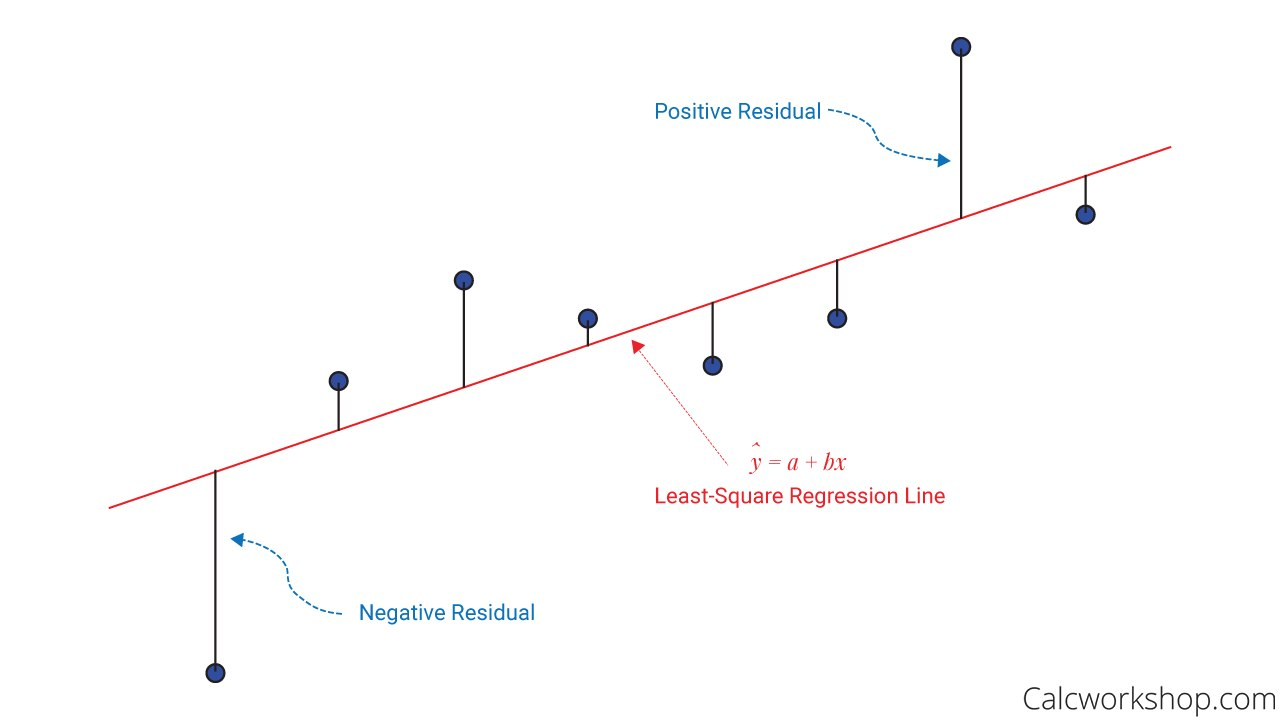

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("dataset.csv")
train, test = train_test_split(data, test_size=0.1)
train.shape, test.shape

((90, 2), (10, 2))

In [3]:
data.head()

,height,weight
0,186.63,90.97
1,169.75,62.76
2,168.66,56.16
3,173.03,64.37
4,172.21,64.71


#### "Обучение"

In [4]:
x = train.height
y = train.weight

a_ch = (len(train) * (x * y).sum()) - (x.sum() * y.sum())
a_zn = len(train) * (x ** 2).sum() - x.sum() ** 2
a = a_ch / a_zn
a

np.float64(1.664454701226014)

In [5]:
b = (y.sum() - a * x.sum()) / len(train)
b

np.float64(-220.60885308476196)

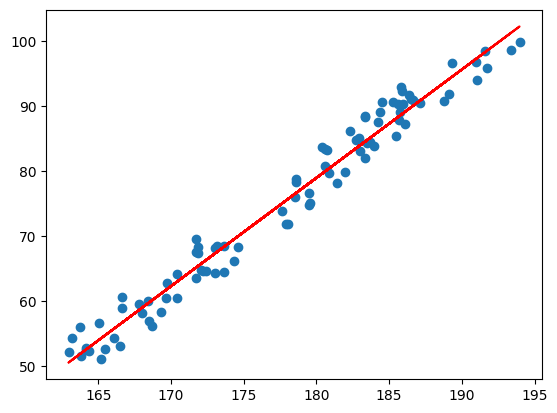

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x, a * x + b, color="red")

#### Test

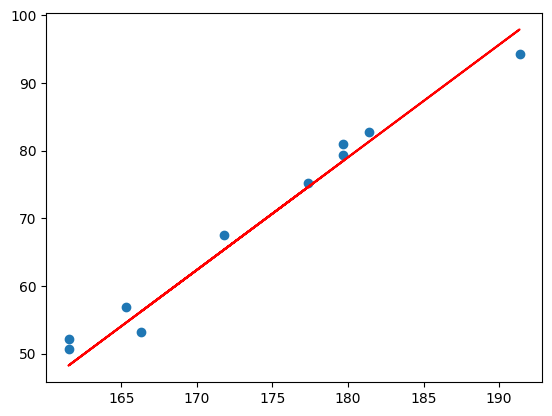

In [7]:
plt.scatter(test.height, test.weight)
plt.plot(test.height, a * test.height + b, color="red")

### Линейная регрессия через градиентный спуск

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Предобработка данных

Датасет: https://archive.ics.uci.edu/dataset/10/automobile

In [9]:
data = pd.read_csv("automobile/imports-85.data", header=None, na_values="?")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       164 non-null    float64
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       203 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      201 non-null    float64
 19  19      201 non-null    float64
 20  20      205 non-null    float64
 21  21      203 non-null    float64
 22  22

In [11]:
data.loc[:, data.dtypes == "float64"] = data.loc[:, data.dtypes == "float64"].fillna(
    data.loc[:, data.dtypes == "float64"].mean(axis=0)
)
data.loc[:, data.dtypes == "object"] = data.loc[:, data.dtypes == "object"].fillna("")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [12]:
data.loc[:, data.dtypes == "object"].shape

(205, 10)

In [13]:
data.loc[:, data.dtypes == "float64"].shape

(205, 11)

In [14]:
data_encoded = pd.get_dummies(data)
data_encoded

,0,1,9,10,11,12,13,16,18,19,...,15_twelve,15_two,17_1bbl,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


In [15]:
data_encoded.columns = data_encoded.columns.astype(str)
X = data_encoded.drop(columns=["25"])
y = data_encoded["25"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((184, 76), (184,), (21, 76), (21,))

In [18]:
scaler = RobustScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = LinearRegression().fit(X_train, y_train)
preds = model.predict(X_test)
print(
    f"""
    MSE_test = {metrics.mean_squared_error(preds, y_test)},
    MAE_test = {metrics.mean_absolute_error(preds, y_test)}
    r2_test = {metrics.r2_score(y_test, preds)}
"""
)


    MSE_test = 4532429.049374134,
    MAE_test = 1604.1453640139025
    r2_test = 0.9428782016234765



In [20]:
class MyLinearRegression:
    def __init__(self, lr=0.001, num_iter=10000) -> None:
        self.lr = lr
        self.num_iter = num_iter

    def calculate_loss(self, y, y_pred):
        return ((y - y_pred) ** 2).mean()

    def calculate_dldw(self, y, y_pred, x):
        grad_w = (-2 * (x.T * (y - y_pred)).T).mean(axis=0)
        return grad_w

    def calculate_dldb(self, y, y_pred):
        grad_b = (-2 * (y - y_pred)).mean()
        return grad_b

    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        self.weights = np.random.rand(X_train.shape[1])
        self.b = 0
        for i in range(self.num_iter):
            pred = (X_train @ self.weights) + self.b
            self.weights -= self.lr * self.calculate_dldw(y_train, pred, X_train)
            self.b -= self.lr * self.calculate_dldb(y_train, pred)

    def predict(self, X_test):
        return X_test @ self.weights + self.b

In [21]:
my_model = MyLinearRegression()
my_model.fit(X_train, y_train)
preds = my_model.predict(X_test)
print(
    f"""
    MSE_test = {metrics.mean_squared_error(preds, y_test)},
    MAE_test = {metrics.mean_absolute_error(preds, y_test)}
    r2_test = {metrics.r2_score(y_test, preds)}
"""
)


    MSE_test = 3083207.0342359105,
    MAE_test = 1449.886280340068
    r2_test = 0.9611426172050013



In [22]:
y.mean()

np.float64(13207.129353233831)